In [ ]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sb

In [ ]:
#Load the source data file

df = pd.read_excel (r'/content/Data for Regression.xlsx',parse_dates=['time'])
df.dropna(inplace=True)
print (df)

                    time  O3-y  NO2-x1  CO-x2  SO2-x3  PM2.5-x4  PM10-x5
0    2019-01-01 00:00:00   6.0    53.0    1.2    18.0      56.0     69.0
1    2019-01-01 01:00:00   6.0    52.0    1.1    16.0      54.0     69.0
2    2019-01-01 02:00:00   5.0    46.0    1.0     9.0      55.0     62.0
3    2019-01-01 03:00:00   5.0    50.0    0.9     8.0      52.0     64.0
5    2019-01-01 05:00:00   1.0    50.0    0.9     7.0      50.0     57.0
...                  ...   ...     ...    ...     ...       ...      ...
8602 2019-12-31 19:00:00   2.0    57.0    0.9    10.0      43.0     72.0
8603 2019-12-31 20:00:00   2.0    64.0    0.9    10.0      45.0     75.0
8604 2019-12-31 21:00:00   2.0    68.0    1.1    10.0      48.0     85.0
8605 2019-12-31 22:00:00   2.0    67.0    1.2     9.0      54.0     91.0
8606 2019-12-31 23:00:00   2.0    68.0    1.2     9.0      47.0     77.0

[5921 rows x 7 columns]


In [ ]:
#Arrangement of average pollutants per month

df_month = df.resample('M', on='time').agg({'O3-y':'mean', 'NO2-x1':'mean','CO-x2':'mean','SO2-x3':'mean','PM2.5-x4':'mean','PM10-x5':'mean'})

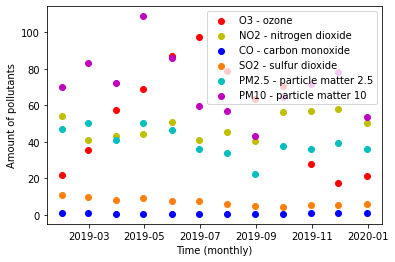

In [ ]:
#Create scatter plot to compare the relationship between pollutants in a monthly trend

import matplotlib.pyplot as plt
import numpy as np
df_month['x1'] = df_month.index
time_monthly=df_month['x1']
O3_plot=df_month["O3-y"]
NO2_plot=df_month["NO2-x1"]
CO_plot=df_month["CO-x2"]
SO2_plot=df_month["SO2-x3"]
PM25_plot=df_month["PM2.5-x4"]
PM10_plot=df_month["PM10-x5"]
plt.scatter(time_monthly, O3_plot, label='O3 - ozone', color='r')
plt.scatter(time_monthly, NO2_plot, label='NO2 - nitrogen dioxide', color='y')
plt.scatter(time_monthly, CO_plot, label='CO - carbon monoxide', color='b')
plt.scatter(time_monthly, SO2_plot, label='SO2 - sulfur dioxide', color='tab:orange')
plt.scatter(time_monthly, PM25_plot, label='PM2.5 - particle matter 2.5', color='c')
plt.scatter(time_monthly, PM10_plot, label='PM10 - particle matter 10', color='m')
plt.legend()
plt.xlabel("Time (monthly)")
plt.ylabel("Amount of pollutants")
plt.show()

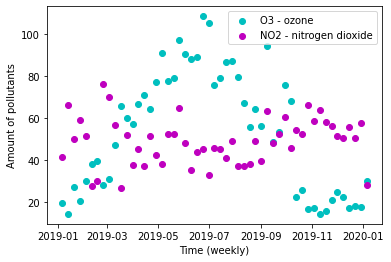

In [ ]:
#Relationships between ozone and nitrogen dioxide per week in a year

df_O3NO2=df.drop(columns=['CO-x2', 'SO2-x3','PM2.5-x4','PM10-x5'])
df_O3NO2_weekly=df_O3NO2.groupby(pd.Grouper(key='time', axis=0, freq='W', sort=True)).mean()
df_O3NO2_weekly['x2'] = df_O3NO2_weekly.index
x1=df_O3NO2_weekly["x2"]
y1=df_O3NO2_weekly["O3-y"]
y2=df_O3NO2_weekly["NO2-x1"]
plt.scatter(x1, y1, label='O3 - ozone', color='c')
plt.scatter(x1, y2, label='NO2 - nitrogen dioxide', color='m')
plt.legend()
plt.xlabel("Time (weekly)")
plt.ylabel("Amount of pollutants")
plt.show()

In [ ]:
#Identify correlation between O3 and NO2 through different statistical methods

correlation1= df_O3NO2_weekly.corr(method="pearson");
print("Pearson correlation coefficient:");
print(correlation1);
correlation2= df_O3NO2_weekly.corr(method="kendall");
print("Kendall Tau correlation coefficient:");
print(correlation2);
correlation3= df_O3NO2_weekly.corr(method="spearman");
print("Spearman rank correlation:");
print(correlation3);

Pearson correlation coefficient:
            O3-y    NO2-x1
O3-y    1.000000 -0.366987
NO2-x1 -0.366987  1.000000
Kendall Tau correlation coefficient:
            O3-y    NO2-x1
O3-y    1.000000 -0.320755
NO2-x1 -0.320755  1.000000
Spearman rank correlation:
            O3-y    NO2-x1
O3-y    1.000000 -0.440171
NO2-x1 -0.440171  1.000000


Coefficient of determination - Linear Regression: 0.13467947374167522


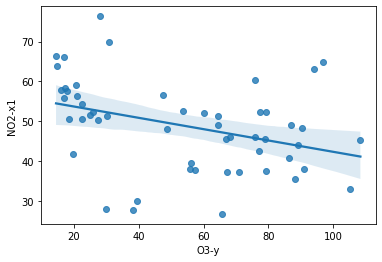

In [ ]:
#Assess fit of linear regression

sb.regplot(data=df_O3NO2_weekly, x="O3-y", y="NO2-x1")
x=df_O3NO2_weekly['O3-y'].values.reshape(-1,1)
y=df_O3NO2_weekly['NO2-x1'].values.reshape(-1,1)
model=LinearRegression().fit(x,y)
r_sq=model.score(x,y)
print('Coefficient of determination - Linear Regression:', r_sq)

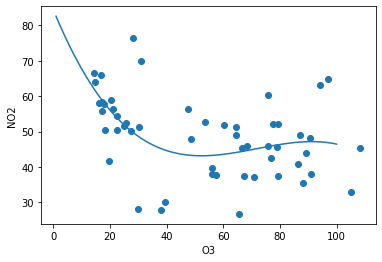

Coefficient of determination - Polynomial Regression (3 Degree): 0.2551053976871117


In [ ]:
#Assess fit of polynomial regression, 3-degree

x=df_O3NO2_weekly['O3-y']
y=df_O3NO2_weekly['NO2-x1']
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 100, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.xlabel("O3")
plt.ylabel("NO2")
plt.show()
print('Coefficient of determination - Polynomial Regression (3 Degree):',r2_score(y, mymodel(x)))

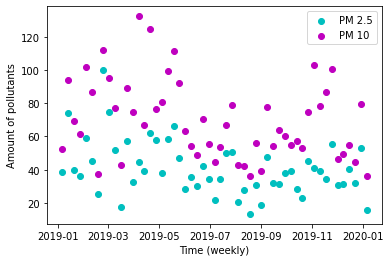

Pearson correlation coefficient:
          PM2.5-x4   PM10-x5
PM2.5-x4  1.000000  0.794812
PM10-x5   0.794812  1.000000
Kendall Tau correlation coefficient:
          PM2.5-x4   PM10-x5
PM2.5-x4  1.000000  0.686502
PM10-x5   0.686502  1.000000
Spearman rank correlation:
          PM2.5-x4   PM10-x5
PM2.5-x4  1.000000  0.867602
PM10-x5   0.867602  1.000000
Coefficient of determination - Linear Regression: 0.6317258225032616


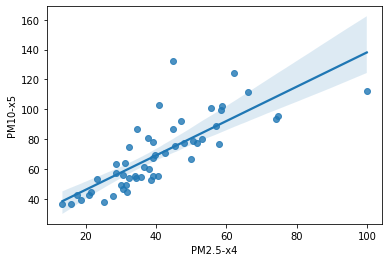

In [ ]:
#Relationships between PM2.5 and PM10 per week in a year

df_PM=df.drop(columns=['O3-y','NO2-x1','CO-x2','SO2-x3'])
df_PM_weekly=df_PM.groupby(pd.Grouper(key='time', axis=0, freq='W', sort=True)).mean()
df_PM_weekly['x3'] = df_PM_weekly.index
x1=df_PM_weekly["x3"]
y1=df_PM_weekly["PM2.5-x4"]
y2=df_PM_weekly["PM10-x5"]

#Scatter plot PM2.5 vs PM10

plt.scatter(x1, y1, label='PM 2.5', color='c')
plt.scatter(x1, y2, label='PM 10', color='m')
plt.legend()
plt.xlabel("Time (weekly)")
plt.ylabel("Amount of pollutants")
plt.show()

#Correlation coefficients PM 2.5 vs PM10

correlation4= df_PM_weekly.corr(method="pearson");
print("Pearson correlation coefficient:");
print(correlation4);
correlation5= df_PM_weekly.corr(method="kendall");
print("Kendall Tau correlation coefficient:");
print(correlation5);
correlation6= df_PM_weekly.corr(method="spearman");
print("Spearman rank correlation:");
print(correlation6);

#Assess fit of linear regression

sb.regplot(data=df_PM_weekly, x="PM2.5-x4", y="PM10-x5")
x=df_PM_weekly['PM2.5-x4'].values.reshape(-1,1)
y=df_PM_weekly['PM10-x5'].values.reshape(-1,1)
model=LinearRegression().fit(x,y)
r_sq=model.score(x,y)
print('Coefficient of determination - Linear Regression:', r_sq)

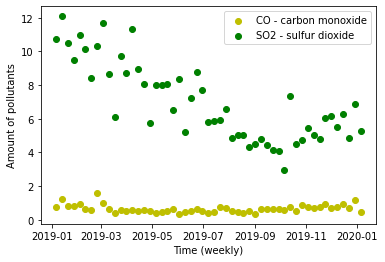

Pearson correlation coefficient:
           CO-x2    SO2-x3
CO-x2   1.000000  0.372357
SO2-x3  0.372357  1.000000
Kendall Tau correlation coefficient:
          CO-x2   SO2-x3
CO-x2   1.00000  0.16836
SO2-x3  0.16836  1.00000
Spearman rank correlation:
           CO-x2    SO2-x3
CO-x2   1.000000  0.254475
SO2-x3  0.254475  1.000000
Coefficient of determination - Linear Regression: 0.13865007543754182


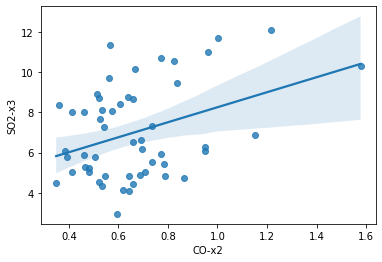

In [ ]:
#Relationships between carbon dioxide and sulfur dioxide per week in a year

df_COSO2=df.drop(columns=['O3-y', 'NO2-x1','PM2.5-x4','PM10-x5'])
df_COSO2_weekly=df_COSO2.groupby(pd.Grouper(key='time', axis=0, freq='W', sort=True)).mean()
df_COSO2_weekly['x4'] = df_COSO2_weekly.index
x1=df_COSO2_weekly["x4"]
y1=df_COSO2_weekly["CO-x2"]
y2=df_COSO2_weekly["SO2-x3"]
plt.scatter(x1, y1, label='CO - carbon monoxide', color='y')
plt.scatter(x1, y2, label='SO2 - sulfur dioxide', color='g')
plt.legend()
plt.xlabel("Time (weekly)")
plt.ylabel("Amount of pollutants")
plt.show()

#Correlation coefficients CO vs SO2

correlation7= df_COSO2_weekly.corr(method="pearson");
print("Pearson correlation coefficient:");
print(correlation7);
correlation8= df_COSO2_weekly.corr(method="kendall");
print("Kendall Tau correlation coefficient:");
print(correlation8);
correlation9= df_COSO2_weekly.corr(method="spearman");
print("Spearman rank correlation:");
print(correlation9);

#Assess fit of linear regression

sb.regplot(data=df_COSO2_weekly, x="CO-x2", y="SO2-x3")
x=df_COSO2_weekly['CO-x2'].values.reshape(-1,1)
y=df_COSO2_weekly['SO2-x3'].values.reshape(-1,1)
model=LinearRegression().fit(x,y)
r_sq=model.score(x,y)
print('Coefficient of determination - Linear Regression:', r_sq)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


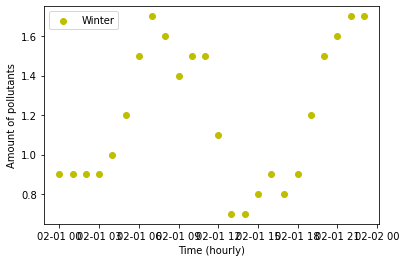

In [ ]:
#Plot for hourly trend in carbon monoxide during a sample day in winter season

df_CO=df.drop(columns=['O3-y','NO2-x1','SO2-x3','PM2.5-x4','PM10-x5'])
df_CO_hourly=df_CO.groupby(pd.Grouper(key='time', axis=0, freq='H', sort=True)).mean()
df_CO_hourly['x4'] = df_CO_hourly.index
df_CO_winter=df_CO_hourly.loc['2019-02-01 00:00:00':'2019-02-01 23:00:00']
df_CO_winter['x3'] = df_CO_winter.index
df_CO_winter.dropna(inplace=True)
x1=df_CO_winter["x3"]
y1=df_CO_winter["CO-x2"]
plt.scatter(x1, y1, label='Winter', color='c')
plt.legend()
plt.xlabel("Time (hourly)")
plt.ylabel("Amount of pollutants")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


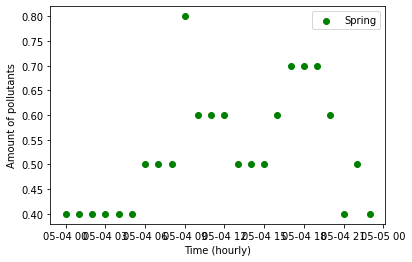

In [ ]:
#Plot for hourly trend in carbon monoxide during a sample day in spring season

df_CO_spring=df_CO_hourly.loc['2019-05-04 00:00:00':'2019-05-04 23:00:00']
df_CO_spring['x4'] = df_CO_spring.index
x2=df_CO_spring["x4"]
y2=df_CO_spring["CO-x2"]
df_CO_spring.dropna(inplace=True)
plt.scatter(x2, y2, label='Spring', color='g')
plt.legend()
plt.xlabel("Time (hourly)")
plt.ylabel("Amount of pollutants")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


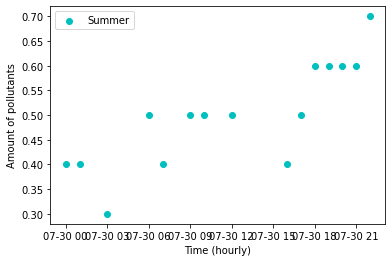

In [ ]:
#Plot for hourly trend in carbon monoxide during a sample day in summer season

df_CO_summer=df_CO_hourly.loc['2019-07-30 00:00:00':'2019-07-30 23:00:00']
df_CO_summer['x5'] = df_CO_summer.index
x3=df_CO_summer["x5"]
y3=df_CO_summer["CO-x2"]
df_CO_summer.dropna(inplace=True)
plt.scatter(x3, y3, label='Summer', color='y')
plt.legend()
plt.xlabel("Time (hourly)")
plt.ylabel("Amount of pollutants")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


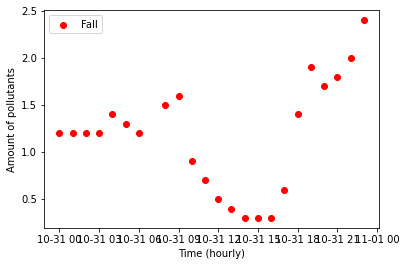

In [ ]:
#Plot for hourly trend in carbon monoxide during a sample day in fall season

df_CO_fall=df_CO_hourly.loc['2019-10-31 00:00:00':'2019-10-31 23:00:00']
df_CO_fall['x6'] = df_CO_fall.index
x3=df_CO_fall["x6"]
y3=df_CO_fall["CO-x2"]
df_CO_fall.dropna(inplace=True)
plt.scatter(x3, y3, label='Fall', color='r')
plt.legend()
plt.xlabel("Time (hourly)")
plt.ylabel("Amount of pollutants")
plt.show()

In [ ]:
#Slice dataset into training set (30%) and test set (70%)

df_CO=df.groupby(pd.Grouper(key='time', axis=0, freq='H', sort=True)).mean()
df_CO_train=df_CO.loc['2019-01-01 00:00:00':'2019-03-31 23:00:00']
df_CO_train.dropna(inplace=True)
df_CO_test=df_CO.loc['2019-04-01 00:00:00':'2019-12-31 23:00:00']
df_CO_test.dropna(inplace=True)
print(df_CO_train)
print(df_CO_test)

                     O3-y  NO2-x1  CO-x2  SO2-x3  PM2.5-x4  PM10-x5
time                                                               
2019-01-01 00:00:00   6.0    53.0    1.2    18.0      56.0     69.0
2019-01-01 01:00:00   6.0    52.0    1.1    16.0      54.0     69.0
2019-01-01 02:00:00   5.0    46.0    1.0     9.0      55.0     62.0
2019-01-01 03:00:00   5.0    50.0    0.9     8.0      52.0     64.0
2019-01-01 05:00:00   1.0    50.0    0.9     7.0      50.0     57.0
...                   ...     ...    ...     ...       ...      ...
2019-03-31 18:00:00  89.0    11.0    0.2     5.0      16.0     50.0
2019-03-31 19:00:00  81.0    16.0    0.2     6.0      15.0     33.0
2019-03-31 20:00:00  87.0    10.0    0.2     6.0       8.0     31.0
2019-03-31 21:00:00  76.0    16.0    0.2     6.0       8.0     30.0
2019-03-31 22:00:00  51.0    35.0    0.3     5.0       9.0     34.0

[1496 rows x 6 columns]
                     O3-y  NO2-x1  CO-x2  SO2-x3  PM2.5-x4  PM10-x5
time                   

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
